In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from sklearn.linear_model import LinearRegression

df_merged = pd.read_csv("df_merged.csv")
df_ed = pd.read_csv("edu_clean.csv")

In [2]:
df_merged = df_merged.rename(columns={'last_10': 'ingresos'})
df_merged = df_merged.rename(columns={'last_10_pib': 'pip'})
df_merged

,Estado,ingresos,pip
0,Aguascalientes,2.016486e+06,2.016486e+06
1,Baja California,5.294618e+06,5.294618e+06
2,Baja California Sur,1.356479e+06,1.356479e+06
3,Campeche,5.889050e+06,5.889050e+06
4,Coahuila de Zaragoza,5.700187e+06,5.700187e+06
5,Colima,9.888492e+05,9.888492e+05
6,Chiapas,2.764085e+06,2.764085e+06
7,Chihuahua,5.260455e+06,5.260455e+06
8,Ciudad de México,2.898900e+07,2.898900e+07
9,Durango,1.954741e+06,1.954741e+06


In [10]:
df = df_ed
df

,Entidad federativa,Total,Primaria,Secundaria,Media superior,Superior,Year
0,Estados Unidos Mexicanos,28569473,14792528,5349659,2955783,2047895,2000
1,Estados Unidos Mexicanos,31085098,14548194,5979256,3658754,2446726,2005
2,Estados Unidos Mexicanos,32835292,14887845,6137546,4187528,2981313,2010
3,Estados Unidos Mexicanos,34531661,14250425,6835245,4985080,3648945,2015
4,Estados Unidos Mexicanos,33612855,13677465,6394720,4985005,4030616,2020
...,...,...,...,...,...,...,...
193,Zacatecas,418011,198656,81896,45401,27198,2005
194,Zacatecas,446097,204562,82536,53160,35570,2010
195,Zacatecas,479072,196740,95265,64459,46802,2015
196,Zacatecas,478383,197572,89335,62703,51034,2020


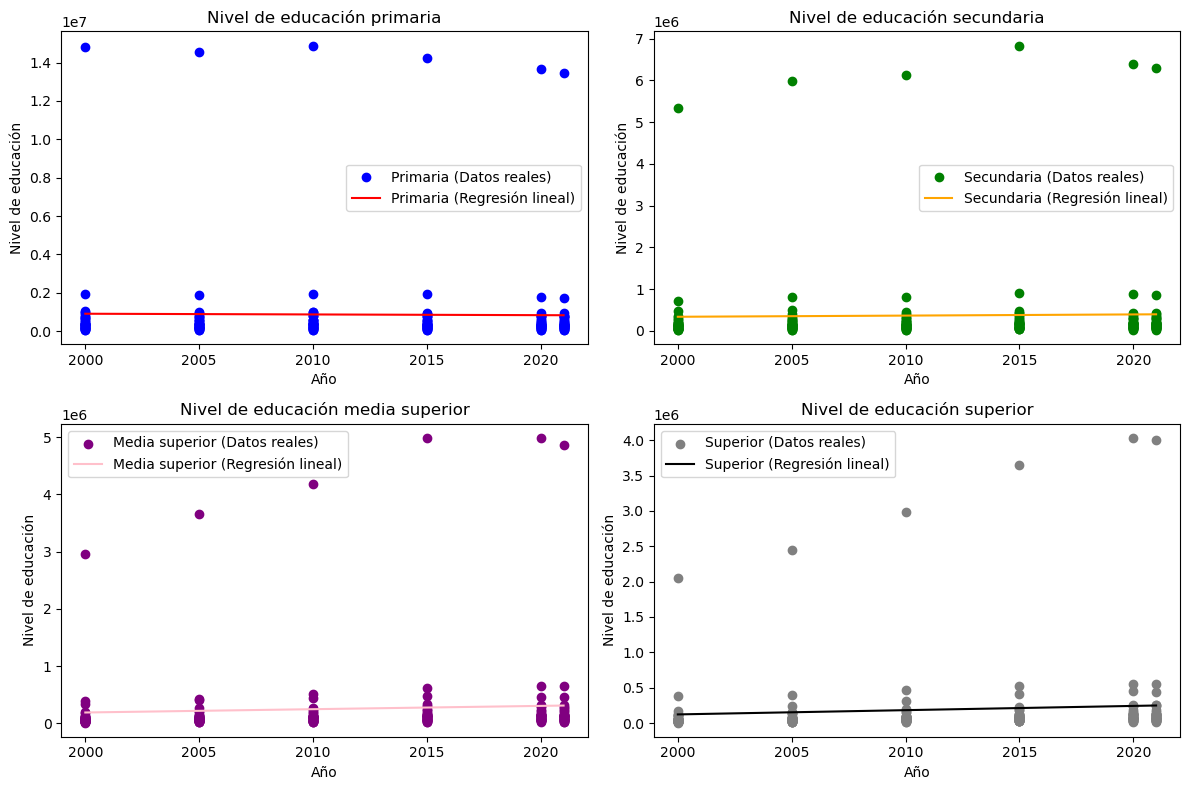

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


# Extraer las columnas relevantes para el modelo de regresión lineal
X = df[['Year']]
y_primaria = df['Primaria']
y_secundaria = df['Secundaria']
y_media_superior = df['Media superior']
y_superior = df['Superior']

# Crear el modelo de regresión lineal
regression = LinearRegression()

# Entrenar el modelo de regresión lineal para cada nivel de educación
regression.fit(X, y_primaria)
pred_primaria = regression.predict(X)

regression.fit(X, y_secundaria)
pred_secundaria = regression.predict(X)

regression.fit(X, y_media_superior)
pred_media_superior = regression.predict(X)

regression.fit(X, y_superior)
pred_superior = regression.predict(X)

# Generar gráficas
plt.figure(figsize=(12, 8))

# Gráfica para el nivel de educación primaria
plt.subplot(2, 2, 1)
plt.scatter(X, y_primaria, color='blue', label='Primaria (Datos reales)')
plt.plot(X, pred_primaria, color='red', label='Primaria (Regresión lineal)')
plt.xlabel('Año')
plt.ylabel('Nivel de educación')
plt.title('Nivel de educación primaria')
plt.legend()

# Gráfica para el nivel de educación secundaria
plt.subplot(2, 2, 2)
plt.scatter(X, y_secundaria, color='green', label='Secundaria (Datos reales)')
plt.plot(X, pred_secundaria, color='orange', label='Secundaria (Regresión lineal)')
plt.xlabel('Año')
plt.ylabel('Nivel de educación')
plt.title('Nivel de educación secundaria')
plt.legend()

# Gráfica para el nivel de educación media superior
plt.subplot(2, 2, 3)
plt.scatter(X, y_media_superior, color='purple', label='Media superior (Datos reales)')
plt.plot(X, pred_media_superior, color='pink', label='Media superior (Regresión lineal)')
plt.xlabel('Año')
plt.ylabel('Nivel de educación')
plt.title('Nivel de educación media superior')
plt.legend()

# Gráfica para el nivel de educación superior
plt.subplot(2, 2, 4)
plt.scatter(X, y_superior, color='gray', label='Superior (Datos reales)')
plt.plot(X, pred_superior, color='black', label='Superior (Regresión lineal)')
plt.xlabel('Año')
plt.ylabel('Nivel de educación')
plt.title('Nivel de educación superior')
plt.legend()

plt.tight_layout()
plt.show()


In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Cargar los datos desde un archivo CSV
data = df_merged

# Separar las características (PIB) y la variable objetivo (ingresos)
X = data['pip'].values.reshape(-1, 1)
y = data['ingresos'].values

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X, y)

# Realizar predicciones utilizando el modelo entrenado
predictions = model.predict(X)

# Imprimir los coeficientes del modelo
print('Coeficiente: ', model.coef_)
print('Intercepto: ', model.intercept_)

# Calcular el coeficiente de determinación (R^2)
r2 = model.score(X, y)
print('Coeficiente de determinación (R^2): ', r2)


Coeficiente:  [1.]
Intercepto:  0.0
Coeficiente de determinación (R^2):  1.0


                            OLS Regression Results                            
Dep. Variable:               ingresos   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.092e+33
Date:                Thu, 08 Jun 2023   Prob (F-statistic):               0.00
Time:                        03:45:50   Log-Likelihood:                 621.44
No. Observations:                  32   AIC:                            -1239.
Df Residuals:                      30   BIC:                            -1236.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.164e-09   2.27e-10      5.139      0.0

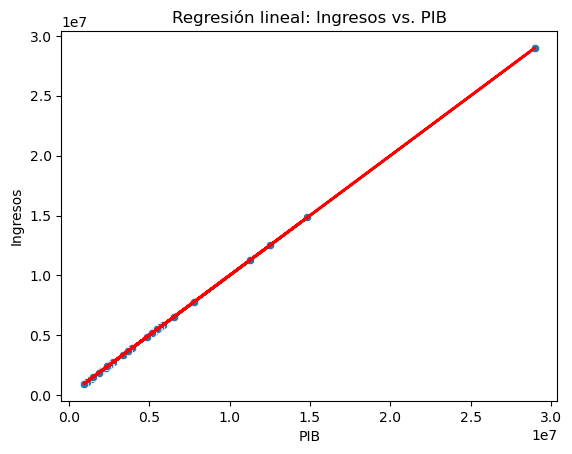

In [9]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns


# Separar las características (PIB) y la variable objetivo (ingresos)
X = data['pip']
y = data['ingresos']

# Agregar una constante a X para estimar el intercepto del modelo
X = sm.add_constant(X)

# Crear y ajustar el modelo de regresión lineal
model = sm.OLS(y, X)
results = model.fit()

# Imprimir un resumen de los resultados del modelo
print(results.summary())

# Graficar los datos y el modelo de regresión lineal
sns.scatterplot(x='pip', y='ingresos', data=data)
plt.plot(X['pip'], results.predict(), color='red', linewidth=2)



# Mostrar la gráfica
plt.xlabel('PIB')
plt.ylabel('Ingresos')
plt.title('Regresión lineal: Ingresos vs. PIB')
plt.show()


In [36]:
import pandas as pd

# Cargar los datos desde el archivo CSV
data = df_ed

# Filtrar los datos para obtener solo la educación superior (columna 'Superior')
data_superior = data[['Entidad federativa', 'Superior']]

# Agrupar por entidad federativa y calcular la suma de la educación superior
suma_superior_por_entidad = data_superior.groupby('Entidad federativa')['Superior'].sum().reset_index()

# Imprimir los resultados

suma_superior_por_entidad

suma_superior_por_entidad = suma_superior_por_entidad.drop(index= [10]).reset_index(drop=True)

suma_superior_por_entidad

,Entidad federativa,Superior
0,Aguascalientes,241905
1,Baja California,571419
2,Baja California Sur,108699
3,Campeche,144423
4,Chiapas,414615
5,Chihuahua,631361
6,Ciudad de México,2883640
7,Coahuila de Zaragoza,534595
8,Colima,112878
9,Durango,248984


In [32]:
df_merged

,Estado,ingresos,pip
0,Aguascalientes,2.016486e+06,2.016486e+06
1,Baja California,5.294618e+06,5.294618e+06
2,Baja California Sur,1.356479e+06,1.356479e+06
3,Campeche,5.889050e+06,5.889050e+06
4,Coahuila de Zaragoza,5.700187e+06,5.700187e+06
5,Colima,9.888492e+05,9.888492e+05
6,Chiapas,2.764085e+06,2.764085e+06
7,Chihuahua,5.260455e+06,5.260455e+06
8,Ciudad de México,2.898900e+07,2.898900e+07
9,Durango,1.954741e+06,1.954741e+06


In [37]:
import pandas as pd
import numpy as np


# Obtener las columnas de ingresos y suma_superior_por_entidad
ingresos = df_merged['ingresos']
superior = suma_superior_por_entidad["Superior"]

# Calcular la correlación entre las dos variables
correlation = np.corrcoef(ingresos, superior)[0, 1]

# Imprimir el resultado de la correlación
print('Correlación:', correlation)


Correlación: -0.008021692467732754


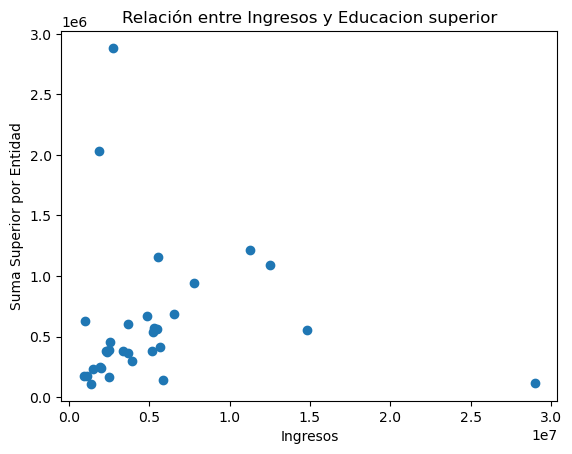

In [40]:
# Crear una gráfica de dispersión
plt.scatter(ingresos, superior)
plt.xlabel('Ingresos')
plt.ylabel('Suma Superior por Entidad')
plt.title('Relación entre Ingresos y Educacion superior')
plt.show()